# Prueba
Hola soy una prueba

In [26]:
import wfdb
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [34]:
name='a104s'
# Specify the path to the .hea file
hea_file = 'data/training/'+name
# Read the .hea file
record = wfdb.rdheader(hea_file)
# Access the attributes of the record
print(record.__dict__)


{'record_name': 'a104s', 'n_sig': 3, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 75000, 'base_time': None, 'base_date': None, 'comments': ['Asystole', 'False alarm'], 'sig_name': ['II', 'V', 'PLETH'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['a104s.mat', 'a104s.mat', 'a104s.mat'], 'fmt': ['16', '16', '16'], 'samps_per_frame': [1, 1, 1], 'skew': [None, None, None], 'byte_offset': [24, 24, 24], 'adc_gain': [9902.0, 16280.0, 22520.0], 'baseline': [0, 0, 0], 'units': ['mV', 'mV', 'NU'], 'adc_res': [16, 16, 16], 'adc_zero': [0, 0, 0], 'init_value': [-1326, 13863, 10774], 'checksum': [-16385, -22027, 23018], 'block_size': [0, 0, 0]}


In [35]:
# Cargar el archivo .mat
mat_file = sio.loadmat('data/training/'+name+'.mat')

# Mostrar las llaves del archivo para ver qué contiene
print(mat_file.keys())

dict_keys(['val'])


# Explorar el contenido

In [36]:
# El archivo tiene una clave llamada 'val'
ecg_data = mat_file['val']

# Imprimir las dimensiones del dato
print(ecg_data.shape)

# Mostrar las primeras filas de datos
print(ecg_data[:5])


(3, 75000)
[[-1326 -1534 -1326 ...  -654  -702  -819]
 [13863 15524 13608 ... 12735 12718 12805]
 [10774 12343 11128 ... 13074 13070 13012]]


In [37]:
base=0
ganancia=200
ecg = (ecg_data - base )/ganancia # normalizar la señal ecg para que quede entre -1 y 1


ecg = ecg.flatten()
print(ecg)

[[-6.63  -7.67  -6.63  ... -3.27  -3.51  -4.095]
 [69.315 77.62  68.04  ... 63.675 63.59  64.025]
 [53.87  61.715 55.64  ... 65.37  65.35  65.06 ]]


In [39]:
print('mean:', np.mean(ecg))
print('std:', np.std(ecg))
print('min:', np.min(ecg))
print('max:', np.max(ecg))

print('numero de muestras :',ecg.size)

mean: 40.47469151111111
std: 31.560467824087763
min: -78.995
max: 161.215
numero de muestras : 225000


[0.00000e+00 4.00000e-03 8.00000e-03 ... 8.99988e+02 8.99992e+02
 8.99996e+02]
225000


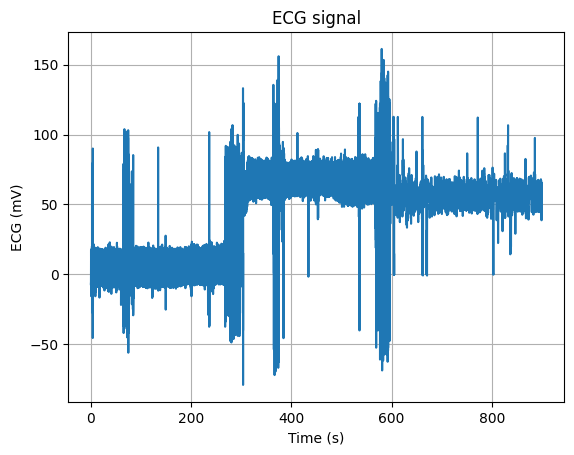

In [40]:
# crear un vector de tiempo para la señal ecg
# vector de tiempo tiene la misma cantidad de muestras que la señal ecg
fs = 250 # frecuencia de muestreo
t = np.arange(0, ecg.size/fs, 1/fs) # vector de tiempo
print(t)
print(t.size)

# flatten the ecg signal to a 1D array
# ecg = ecg.flatten()  # ya se hizo antes

# plot the ecg signal

plt.figure()
plt.plot(t, ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG signal')
plt.grid()
plt.show()
